## Load the test dataset

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the test dataset for plotting
df = pd.read_csv("../data/data_modeltype_gamma.csv")

# Preview first rows
df.head()

,category,predictor,Estimate,CI_low,CI_high,p_value,outcome,n,N,Freq
0,category1,predictor1,0.019167,0.012294,0.026040,4.606853e-08,outcome1,548,1000,0.548
1,category2,predictor2,0.038696,-0.017680,0.095071,1.785258e-01,outcome1,139,1000,0.139
2,category3,predictor3,0.008308,-0.083909,0.100525,8.598415e-01,outcome1,592,1000,0.592
3,category4,predictor4,0.009834,-0.040279,0.059948,7.005215e-01,outcome1,239,1000,0.239
4,category1,predictor5,-0.013475,-0.055834,0.028884,5.329560e-01,outcome1,769,1000,0.769


In [2]:
# # --- DEBUG CELL: tweak one row to simulate extreme values (no file writes) ---
# # Run this after loading `df` and before calling forest_plot()

# df_debug = df.copy()

# mask = (df_debug["predictor"] == "predictor1") & (df_debug["outcome"] == "outcome1")

# # Example 1: if your input is on LOG scale (Estimate/beta/Coef), set log-values:
# # target ratio = 3.50 with 95% CI [2.00, 6.00]
# if {"Estimate", "CI_low", "CI_high"}.issubset(df_debug.columns):
#     import numpy as np
#     df_debug.loc[mask, "Estimate"] = np.log(3.50)
#     df_debug.loc[mask, "CI_low"] = np.log(2.00)
#     df_debug.loc[mask, "CI_high"] = np.log(6.00)

# # Example 2: if your input is already ratio scale (Ratio/OR/effect), set directly:
# if {"Ratio", "CI_low", "CI_high"}.issubset(df_debug.columns):
#     df_debug.loc[mask, "Ratio"] = 3.50
#     df_debug.loc[mask, "CI_low"] = 2.00
#     df_debug.loc[mask, "CI_high"] = 6.00

# if {"OR", "CI_low", "CI_high"}.issubset(df_debug.columns):
#     df_debug.loc[mask, "OR"] = 3.50
#     df_debug.loc[mask, "CI_low"] = 2.00
#     df_debug.loc[mask, "CI_high"] = 6.00

# if {"effect", "ci_low", "ci_high"}.issubset(df_debug.columns):
#     df_debug.loc[mask, "effect"] = 3.50
#     df_debug.loc[mask, "ci_low"] = 2.00
#     df_debug.loc[mask, "ci_high"] = 6.00

# # Optional p-value tweak
# if "p_value" in df_debug.columns:
#     df_debug.loc[mask, "p_value"] = 1e-6

# display(df_debug.loc[mask].head(1))

# # Then call:
# # forest_plot(df=df_debug, outcomes=["outcome1","outcome2"], model_type="gamma", ...)


## Plot Function

---

/home/shervin/Projects/forestplotx/src/forestplotx/plot.py:118: UserWarning: Exponentiation applied automatically (model_type='gamma', link='log', effect_label='Ratio'). If your input data is already on the effect scale, set exponentiate=False to prevent double transformation. Column mapping: Estimate -> effect; CI_low + CI_high -> 95% CI.
  df, plot_config = _normalize_model_output(


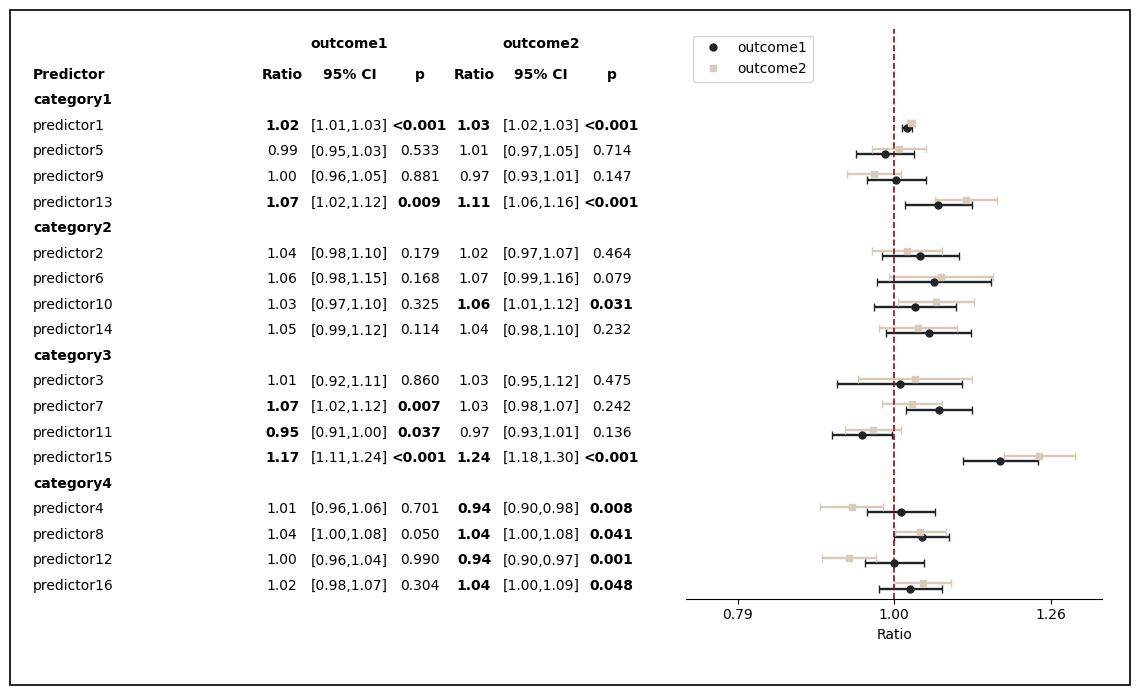

In [3]:
import os
from pathlib import Path
import sys

# Add src folder to sys.path for utility imports
src_path = Path.cwd() / "../src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

from forestplotx.plot import forest_plot

fig, axes = forest_plot(
    df=df,
    outcomes=["outcome1","outcome2"],
    model_type="gamma",
    show_general_stats=False,
    tick_style="decimal",
    exponentiate=None,  # default behavior
    save=False,         # or save="my_plot.png"
    show=True,
)


### Test Case D2

---

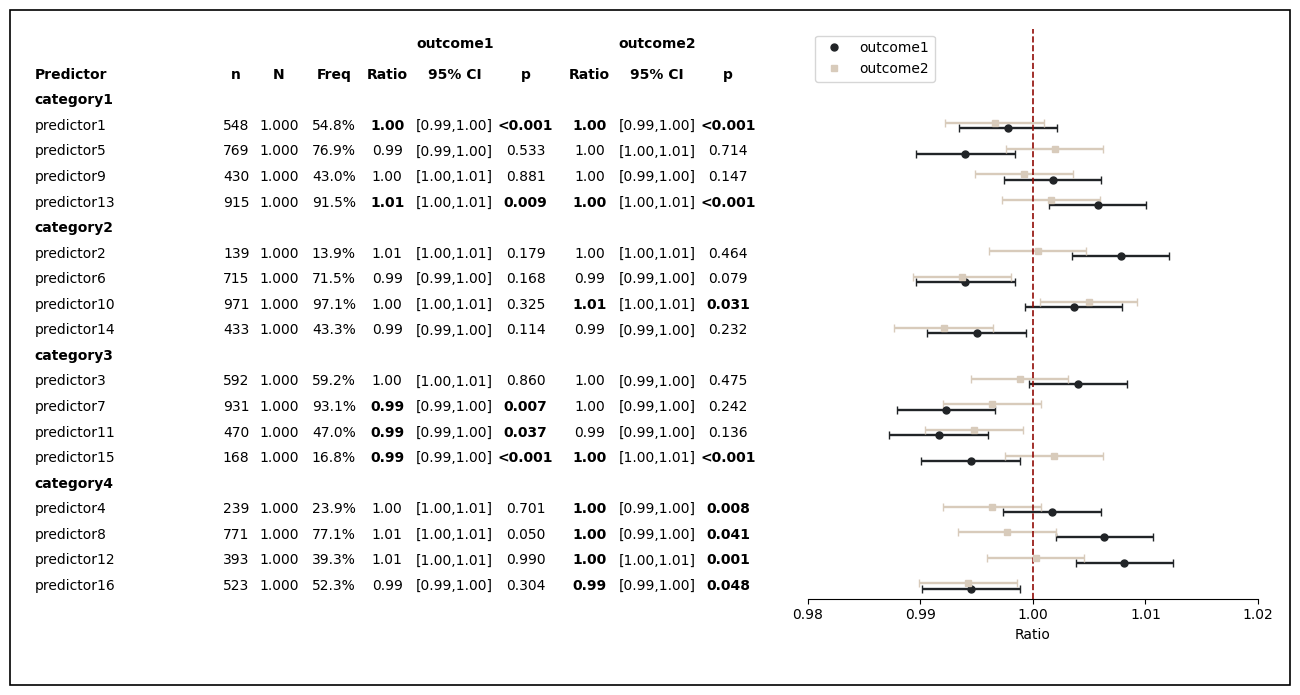

In [4]:
import pandas as pd
import numpy as np
from forestplotx.plot import forest_plot

# Load base binom data
df_binom = pd.read_csv("../data/data_modeltype_gamma.csv")

# D2: tight range around 1.0
np.random.seed(42)
df_d2 = df_binom.copy()
df_d2["OR"] = 1.0 + np.random.uniform(-0.01, 0.01, len(df_d2))
df_d2["CI_low"] = df_d2["OR"] - 0.005
df_d2["CI_high"] = df_d2["OR"] + 0.005

# Quick check with power10 ticks
fig, axes = forest_plot(
    df=df_d2,
    model_type="gamma",
    exponentiate=False,
    tick_style="decimal",
    show_general_stats=True,
    show=True,
    save=None,
)


### Test Case D3

---

/home/shervin/Projects/forestplotx/src/forestplotx/plot.py:580: UserWarning: Linear axis appears outlier-dominated. Consider clip_outliers=True to improve readability while preserving raw table values.
  configure_forest_axis(


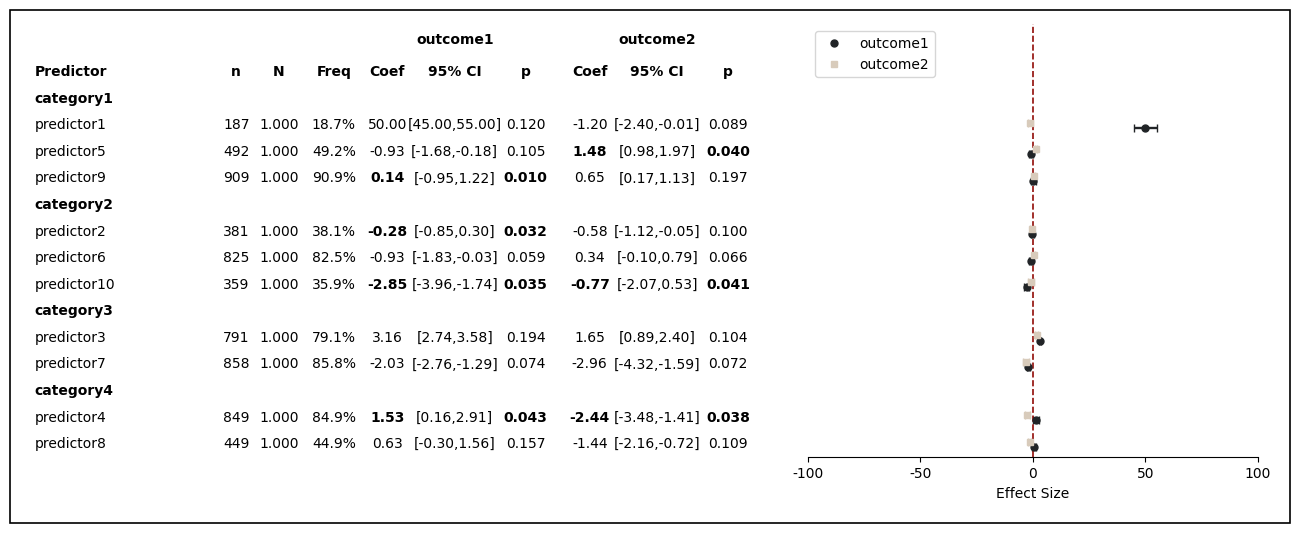

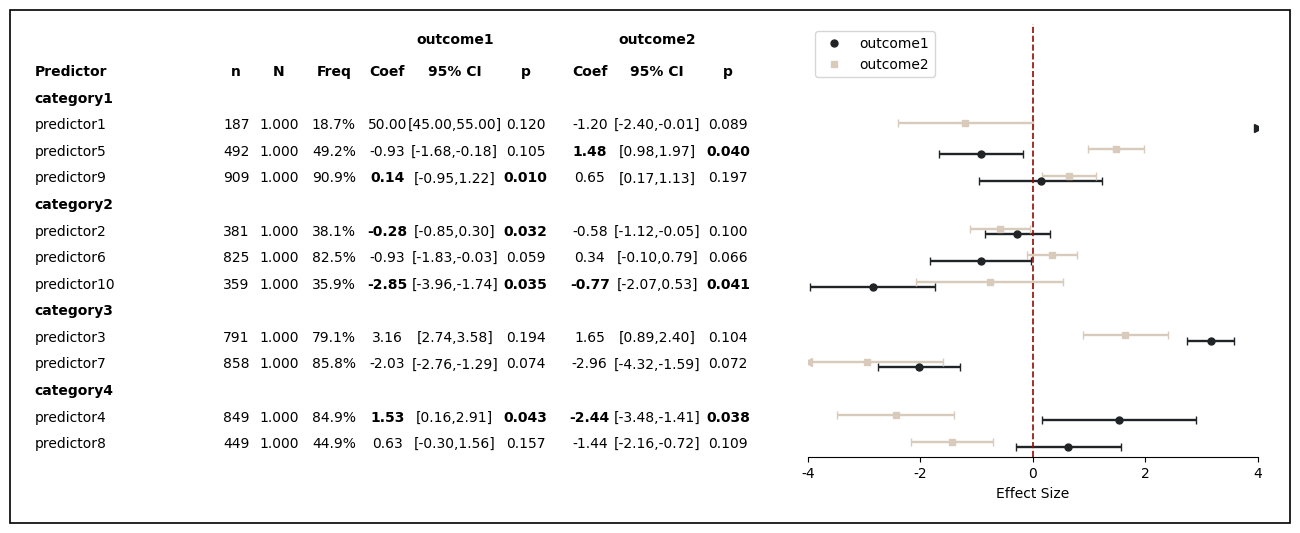

(<Figure size 1600x570 with 2 Axes>, (<Axes: >, <Axes: xlabel='Effect Size'>))

In [5]:
import pandas as pd
from forestplotx.plot import forest_plot

# Base linear data
df_linear = pd.read_csv("../data/data_modeltype_linear.csv")

# D3: inject extreme outlier on predictor1/outcome1
df_d3 = df_linear.copy()
mask = (df_d3["predictor"] == "predictor1") & (df_d3["outcome"] == "outcome1")
df_d3.loc[mask, ["Estimate", "CI_low", "CI_high"]] = [50.0, 45.0, 55.0]

# Baseline (outlier dominates axis)
forest_plot(
    df=df_d3,
    model_type="linear",
    clip_outliers=False,
    show_general_stats=True,
    show=True,
    save=None,
)

# Clipped (readable majority, outlier clipped at boundary)
forest_plot(
    df=df_d3,
    model_type="linear",
    clip_outliers=True, 
    clip_quantiles=(0.02, 0.90),
    show_general_stats=True,
    show=True,
    save=None,
)


### Test Case B4

---

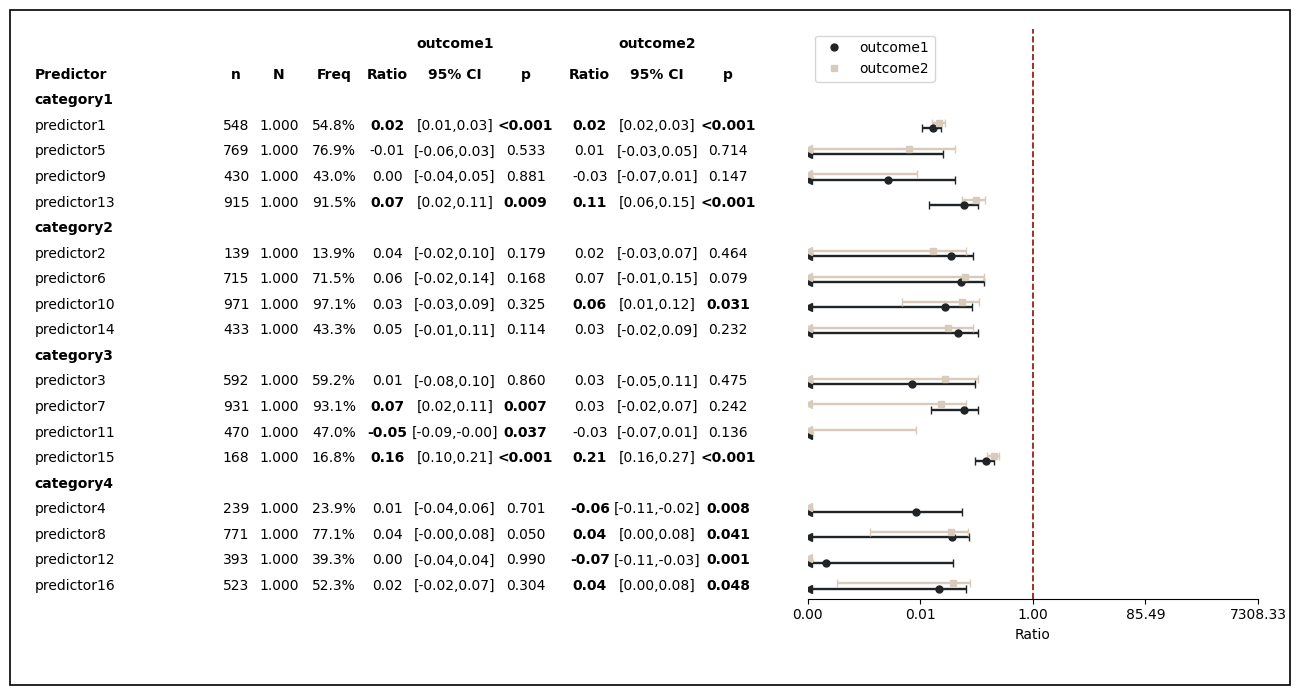

1. UserWarning: Log-scaled forest axis received nonpositive effect/CI values. These values cannot be represented on a log axis and may be clipped. Check whether your data is already exponentiated or set exponentiate=True when input is on the link scale.


In [6]:
import pandas as pd
from forestplotx.plot import forest_plot
import warnings

# Load gamma dataset (log-scale estimates)
df_gamma = pd.read_csv("../data/data_modeltype_gamma.csv")

with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    fig, axes = forest_plot(
    df=df_gamma,
    model_type="gamma",
    exponentiate=False,
    show_general_stats=True,
    show=True,
    save=None,
)
    for i, wi in enumerate(w, 1):
        print(f"{i}. {type(wi.message).__name__}: {wi.message}")



# # B4: force exponentiate=False on gamma (expected problematic on log axis)
# fig, axes = forest_plot(
#     df=df_gamma,
#     model_type="gamma",
#     exponentiate=False,
#     show_general_stats=True,
#     show=True,
#     save=None,
# )


### Test Case F8

---

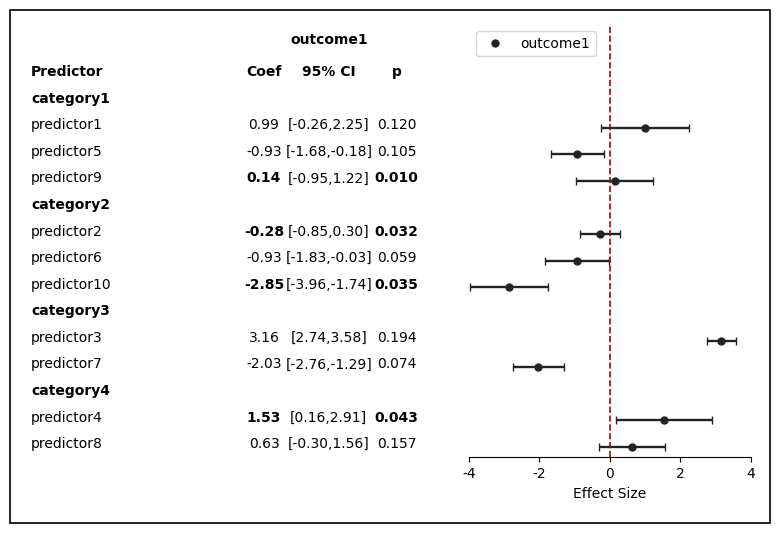

In [7]:
import pandas as pd
from forestplotx.plot import forest_plot

# Base linear dataset
df_linear = pd.read_csv("../data/data_modeltype_linear.csv")

# F8: layout no general + one outcome
fig, axes = forest_plot(
    df=df_linear,
    model_type="linear",
    outcomes=["outcome1"],
    show_general_stats=False,
    show=True,      # set False if you only want to save
    save=None,
)


### Test Case F10

---

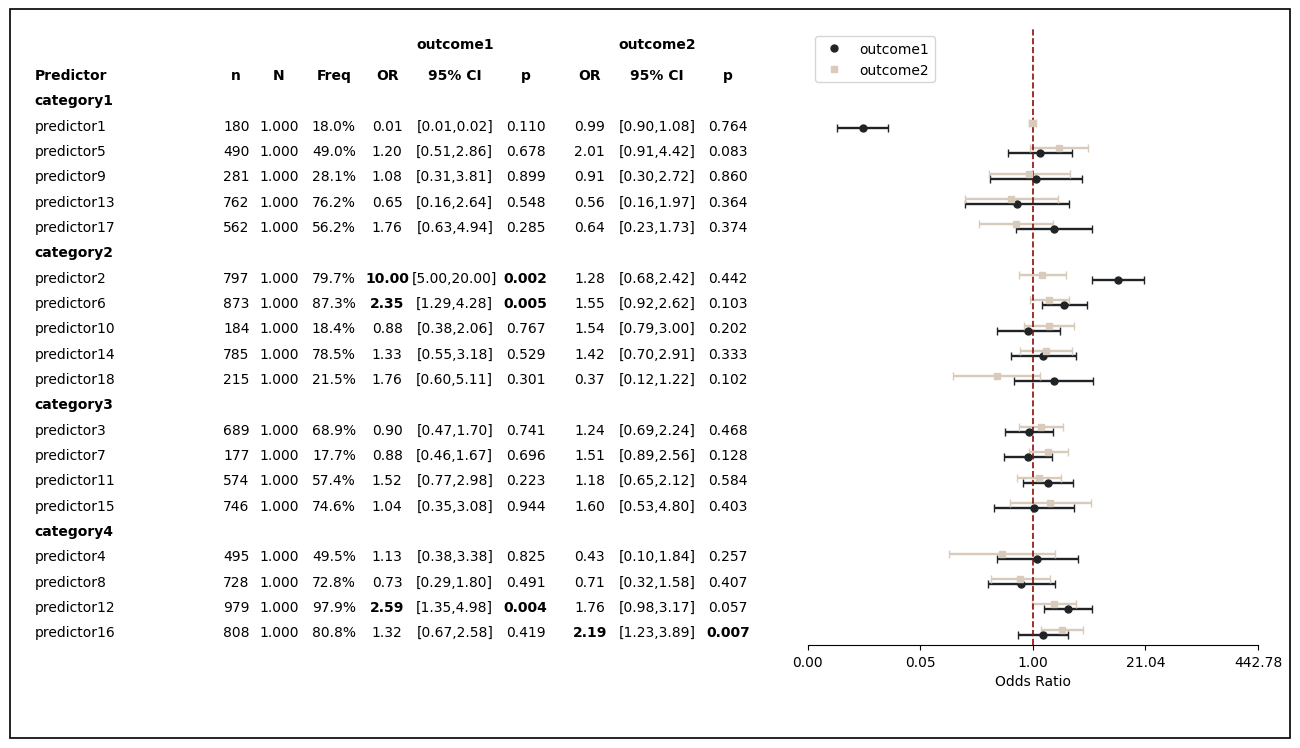

In [8]:
import pandas as pd
from forestplotx.plot import forest_plot

# Load base binom data
df_binom = pd.read_csv("../data/data_modeltype_binom.csv")

# F10 / D6-style wide-range dataset
df_f10 = df_binom.copy()
m1 = (df_f10["predictor"] == "predictor1") & (df_f10["outcome"] == "outcome1")
m2 = (df_f10["predictor"] == "predictor2") & (df_f10["outcome"] == "outcome1")
df_f10.loc[m1, ["OR", "CI_low", "CI_high"]] = [0.01, 0.005, 0.02]
df_f10.loc[m2, ["OR", "CI_low", "CI_high"]] = [10.0, 5.0, 20.0]

# Run F10: clipping enabled
fig, axes = forest_plot(
    df=df_f10,
    model_type="binom",
    exponentiate=False,
    clip_outliers=True,
    clip_quantiles=(0.02, 0.98),  # adjust if you want stronger clipping
    show_general_stats=True,
    tick_style="decimal",
    show=False,
    save=None,
)

### Test Case J1

---

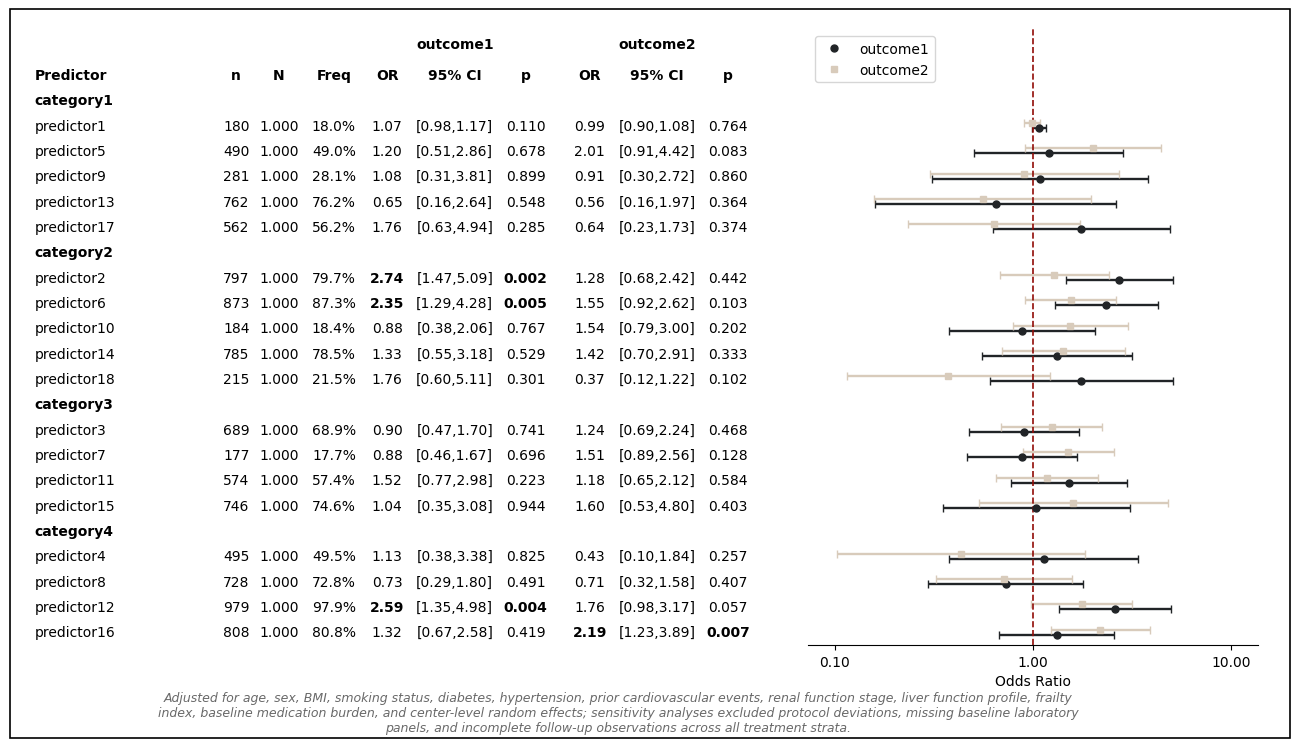

In [9]:
# J1: extremely long footer
import pandas as pd
from forestplotx.plot import forest_plot

df_binom = pd.read_csv("../data/data_modeltype_binom.csv")

long_footer = (
    "Adjusted for age, sex, BMI, smoking status, diabetes, hypertension, prior cardiovascular events, "
    "renal function stage, liver function profile, frailty index, baseline medication burden, and "
    "center-level random effects; sensitivity analyses excluded protocol deviations, missing baseline "
    "laboratory panels, and incomplete follow-up observations across all treatment strata."
)

fig, axes = forest_plot(
    df=df_binom,
    model_type="binom",
    exponentiate=False,
    footer_text=long_footer,
    show=True,
    save=None,
)


### Test Case J3

---

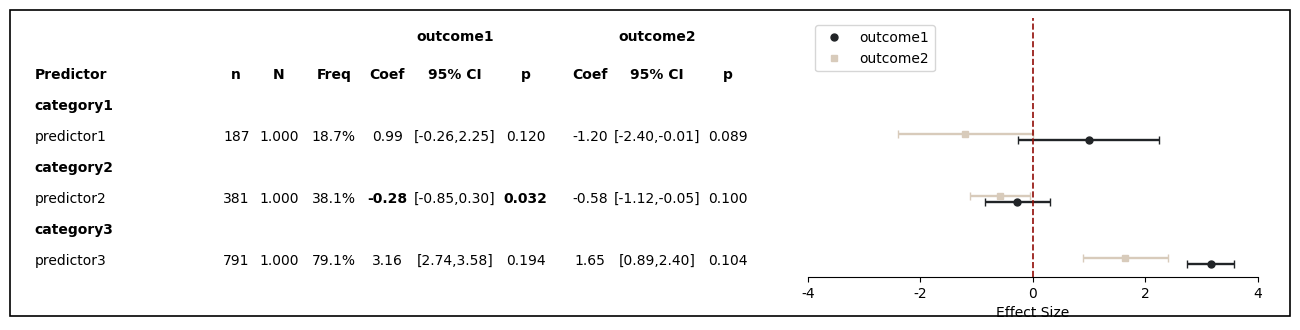

In [10]:
# J3: only 3 predictors
import pandas as pd
from forestplotx.plot import forest_plot

df_linear = pd.read_csv("../data/data_modeltype_linear.csv")
keep_preds = list(df_linear["predictor"].dropna().unique()[:3])
df_j3 = df_linear[df_linear["predictor"].isin(keep_preds)].copy()

fig, axes = forest_plot(
    df=df_j3,
    model_type="linear",
    show=True,
    save=None,
)


## Test Case Large Numbers in General Stats

---

/tmp/ipykernel_270433/2289947396.py:37: UserWarning: Predictor label length exceeded cap (24) for layout (show_general_stats=True, two_outcomes=False). Labels were truncated for display: 'Pneumonoultramicroscopicsilicovolcanoconiosis'.
  fig, axes = forest_plot(


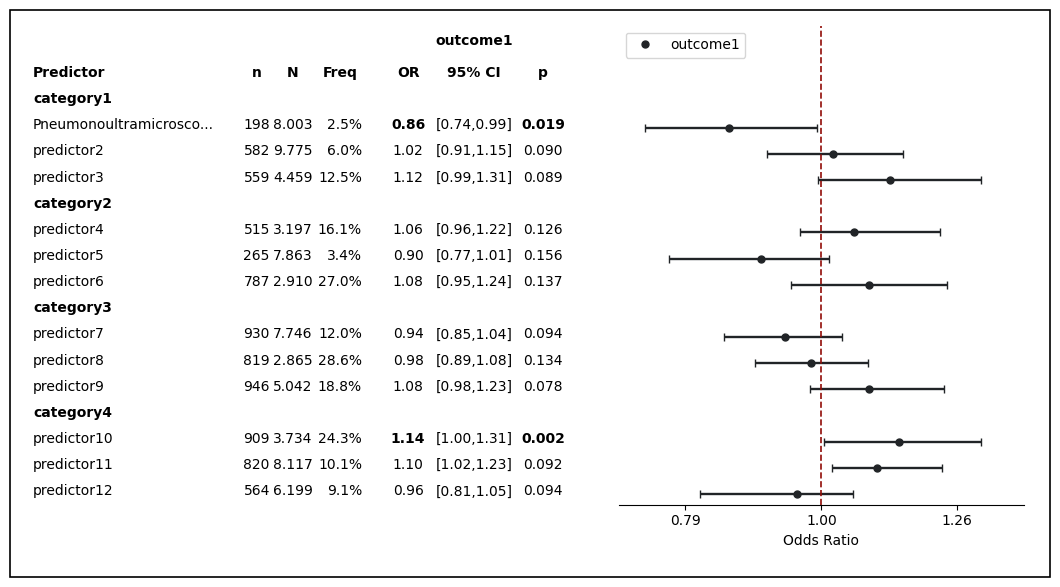

In [11]:
import numpy as np
import pandas as pd
from forestplotx.plot import forest_plot

# Reproducible sample data with large n/N to test compact formatting
rng = np.random.default_rng(42)

predictors = ["Pneumonoultramicroscopicsilicovolcanoconiosis"] + [f"predictor{i}" for i in range(2, 13)]
categories = ["category1"] * 3 + ["category2"] * 3 + ["category3"] * 3 + ["category4"] * 3
outcomes = ["outcome1"]

rows = []
for pred, cat in zip(predictors, categories):
    n_val = int(rng.integers(120, 999))     # 4 digits
    N_val = int(rng.integers(1200, 9990))   # 5 digits
    for out in outcomes:
        eff = rng.normal(0.0, 0.15)           # log-scale estimate for binom
        lo = eff - abs(rng.normal(0.12, 0.03))
        hi = eff + abs(rng.normal(0.12, 0.03))
        p = float(np.clip(rng.uniform(0.0001, 0.2), 0, 1))
        rows.append(
            {
                "predictor": pred,
                "category": cat,
                "outcome": out,
                "Estimate": eff,
                "CI_low": lo,
                "CI_high": hi,
                "p_value": p,
                "n": n_val,
                "N": N_val,
            }
        )

df_test = pd.DataFrame(rows)

fig, axes = forest_plot(
    df=df_test,
    model_type="binom",
    show_general_stats=True,
    exponentiate=True,   # explicit for clarity
    show=True,
    save=None,
)


## Test Case NAN Values

---

/tmp/ipykernel_270433/2590734135.py:21: UserWarning: Suppressed effect/CI/p display for 2 predictor-outcome rows due to missing values.
  fig, axes = forest_plot(


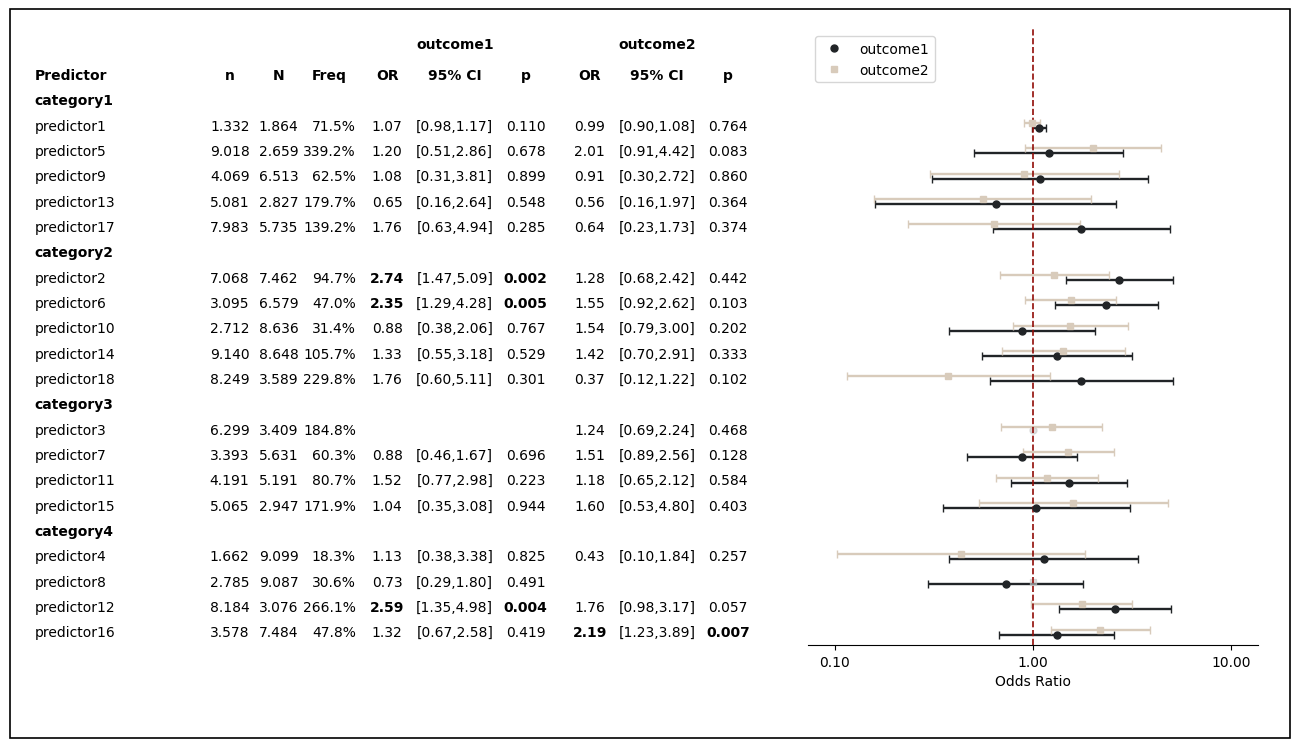

In [17]:
import numpy as np
import pandas as pd
from forestplotx.plot import forest_plot

# Base data (already exponentiated OR scale)
df = pd.read_csv("../data/data_modeltype_binom.csv")

# Add general stats (4-digit style)
rng = np.random.default_rng(123)
df["n"] = rng.integers(1200, 9800, len(df))
df["N"] = rng.integers(1200, 9800, len(df))

# Force one predictor row to become "null row" (strict rule: any missing in effect/CI/p)
mask = (df["predictor"] == "predictor3") & (df["outcome"] == "outcome1")
df.loc[mask, ["OR"]] = np.nan

# Optional: second null to test multiple gray rows
mask2 = (df["predictor"] == "predictor8") & (df["outcome"] == "outcome2")
df.loc[mask2, ["p_value"]] = np.nan

fig, axes = forest_plot(
    df=df,
    model_type="binom",
    exponentiate=False,          # important for this dataset
    outcomes=["outcome1", "outcome2"],
    show_general_stats=True,
    show=True,
    save=None,
)
